# MULTIPLE LINEAR REGRESSION
#### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

#### Task
1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5. Apply Lasso and Ridge methods on the model.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# load data
toyo_raw = pd.read_csv('ToyotaCorolla - MLR.csv')
toyo_raw.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
toyo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
toyo_data = toyo_raw.rename({'Age_08_04':'Age', 'cc':'CC'}, axis = 1)
toyo_data

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
# Checking for missing values
toyo_data.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
# Checking for Duplicates

if(toyo_data.duplicated().sum() != 0):
    # Print Duplicated value
    print(toyo_data[toyo_data.duplicated(keep = False)])

     Price  Age     KM Fuel_Type   HP  Automatic    CC  Doors  Cylinders  \
112  24950    8  13253    Diesel  116          0  2000      5          4   
113  24950    8  13253    Diesel  116          0  2000      5          4   

     Gears  Weight  
112      5    1320  
113      5    1320  


In [7]:
# Remove Duplicates
toyo_data1 = toyo_data.drop_duplicates()
print("No.of Duplicated rows: ", toyo_data1.duplicated().sum())
toyo_data1

No.of Duplicated rows:  0


,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
# Descriptive summary
toyo_data1.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


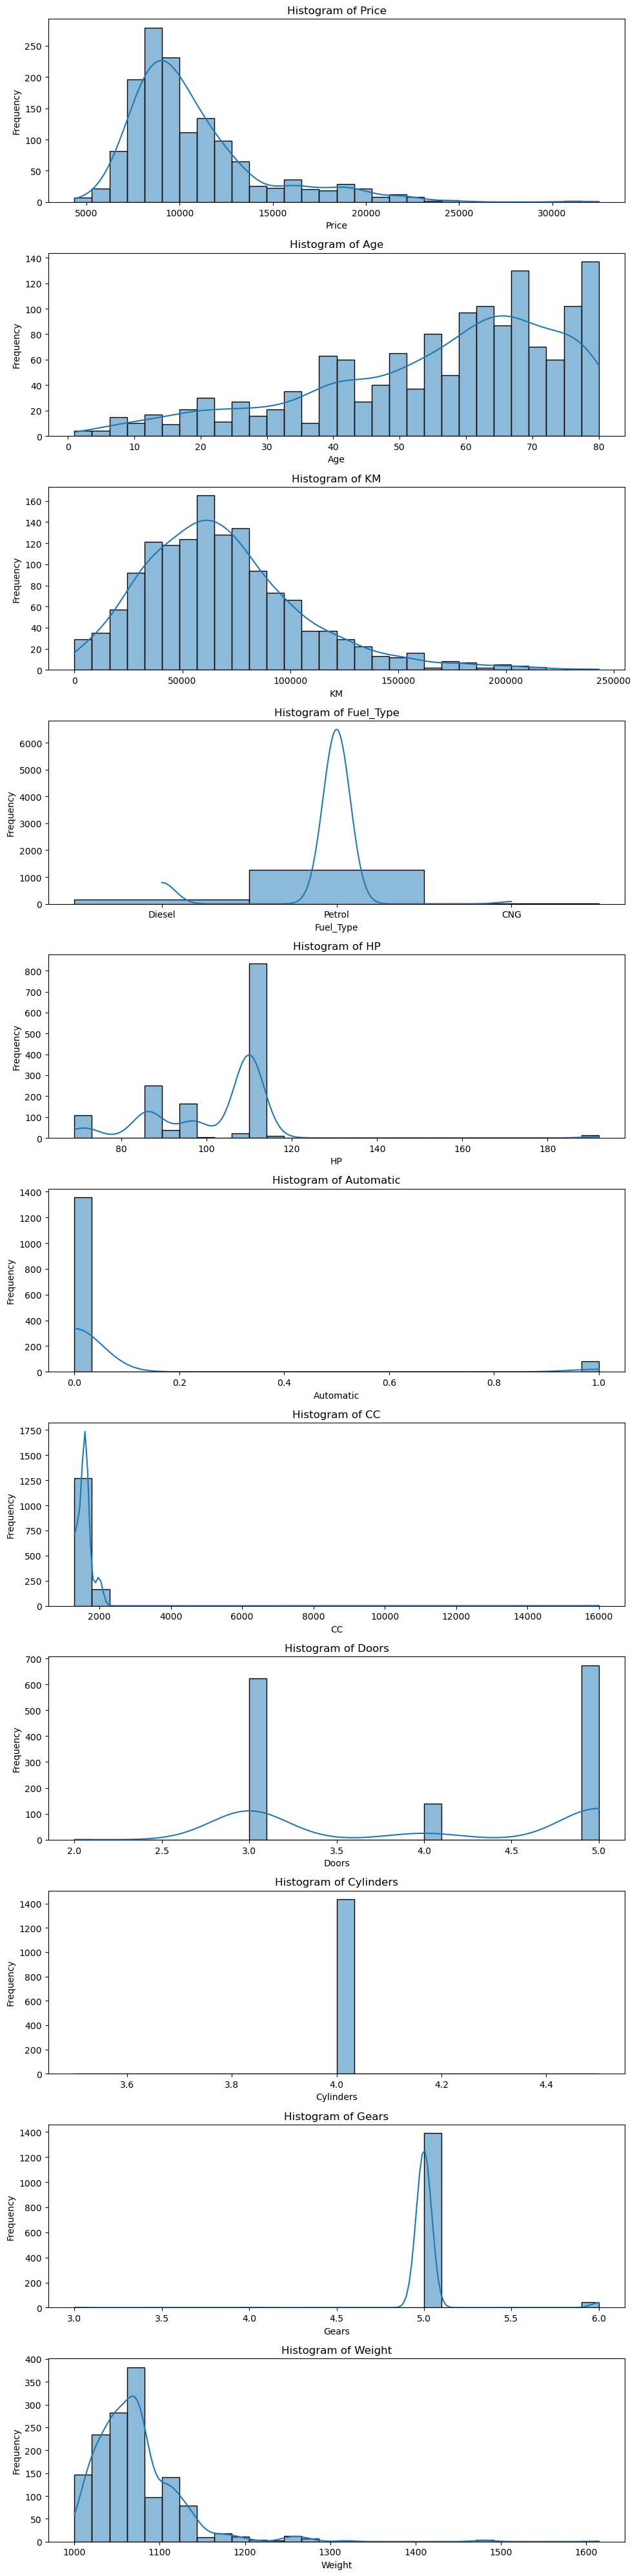

In [9]:
# VISUALISATION
# Distribution of features
# plot Histogram of features
fig = plt.figure(figsize = (10,40))
for i, column in enumerate( toyo_data1,1):
    plt.subplot(11,1,i)
    sns.histplot(toyo_data1[column], bins = 30, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###### Correlation Analysis

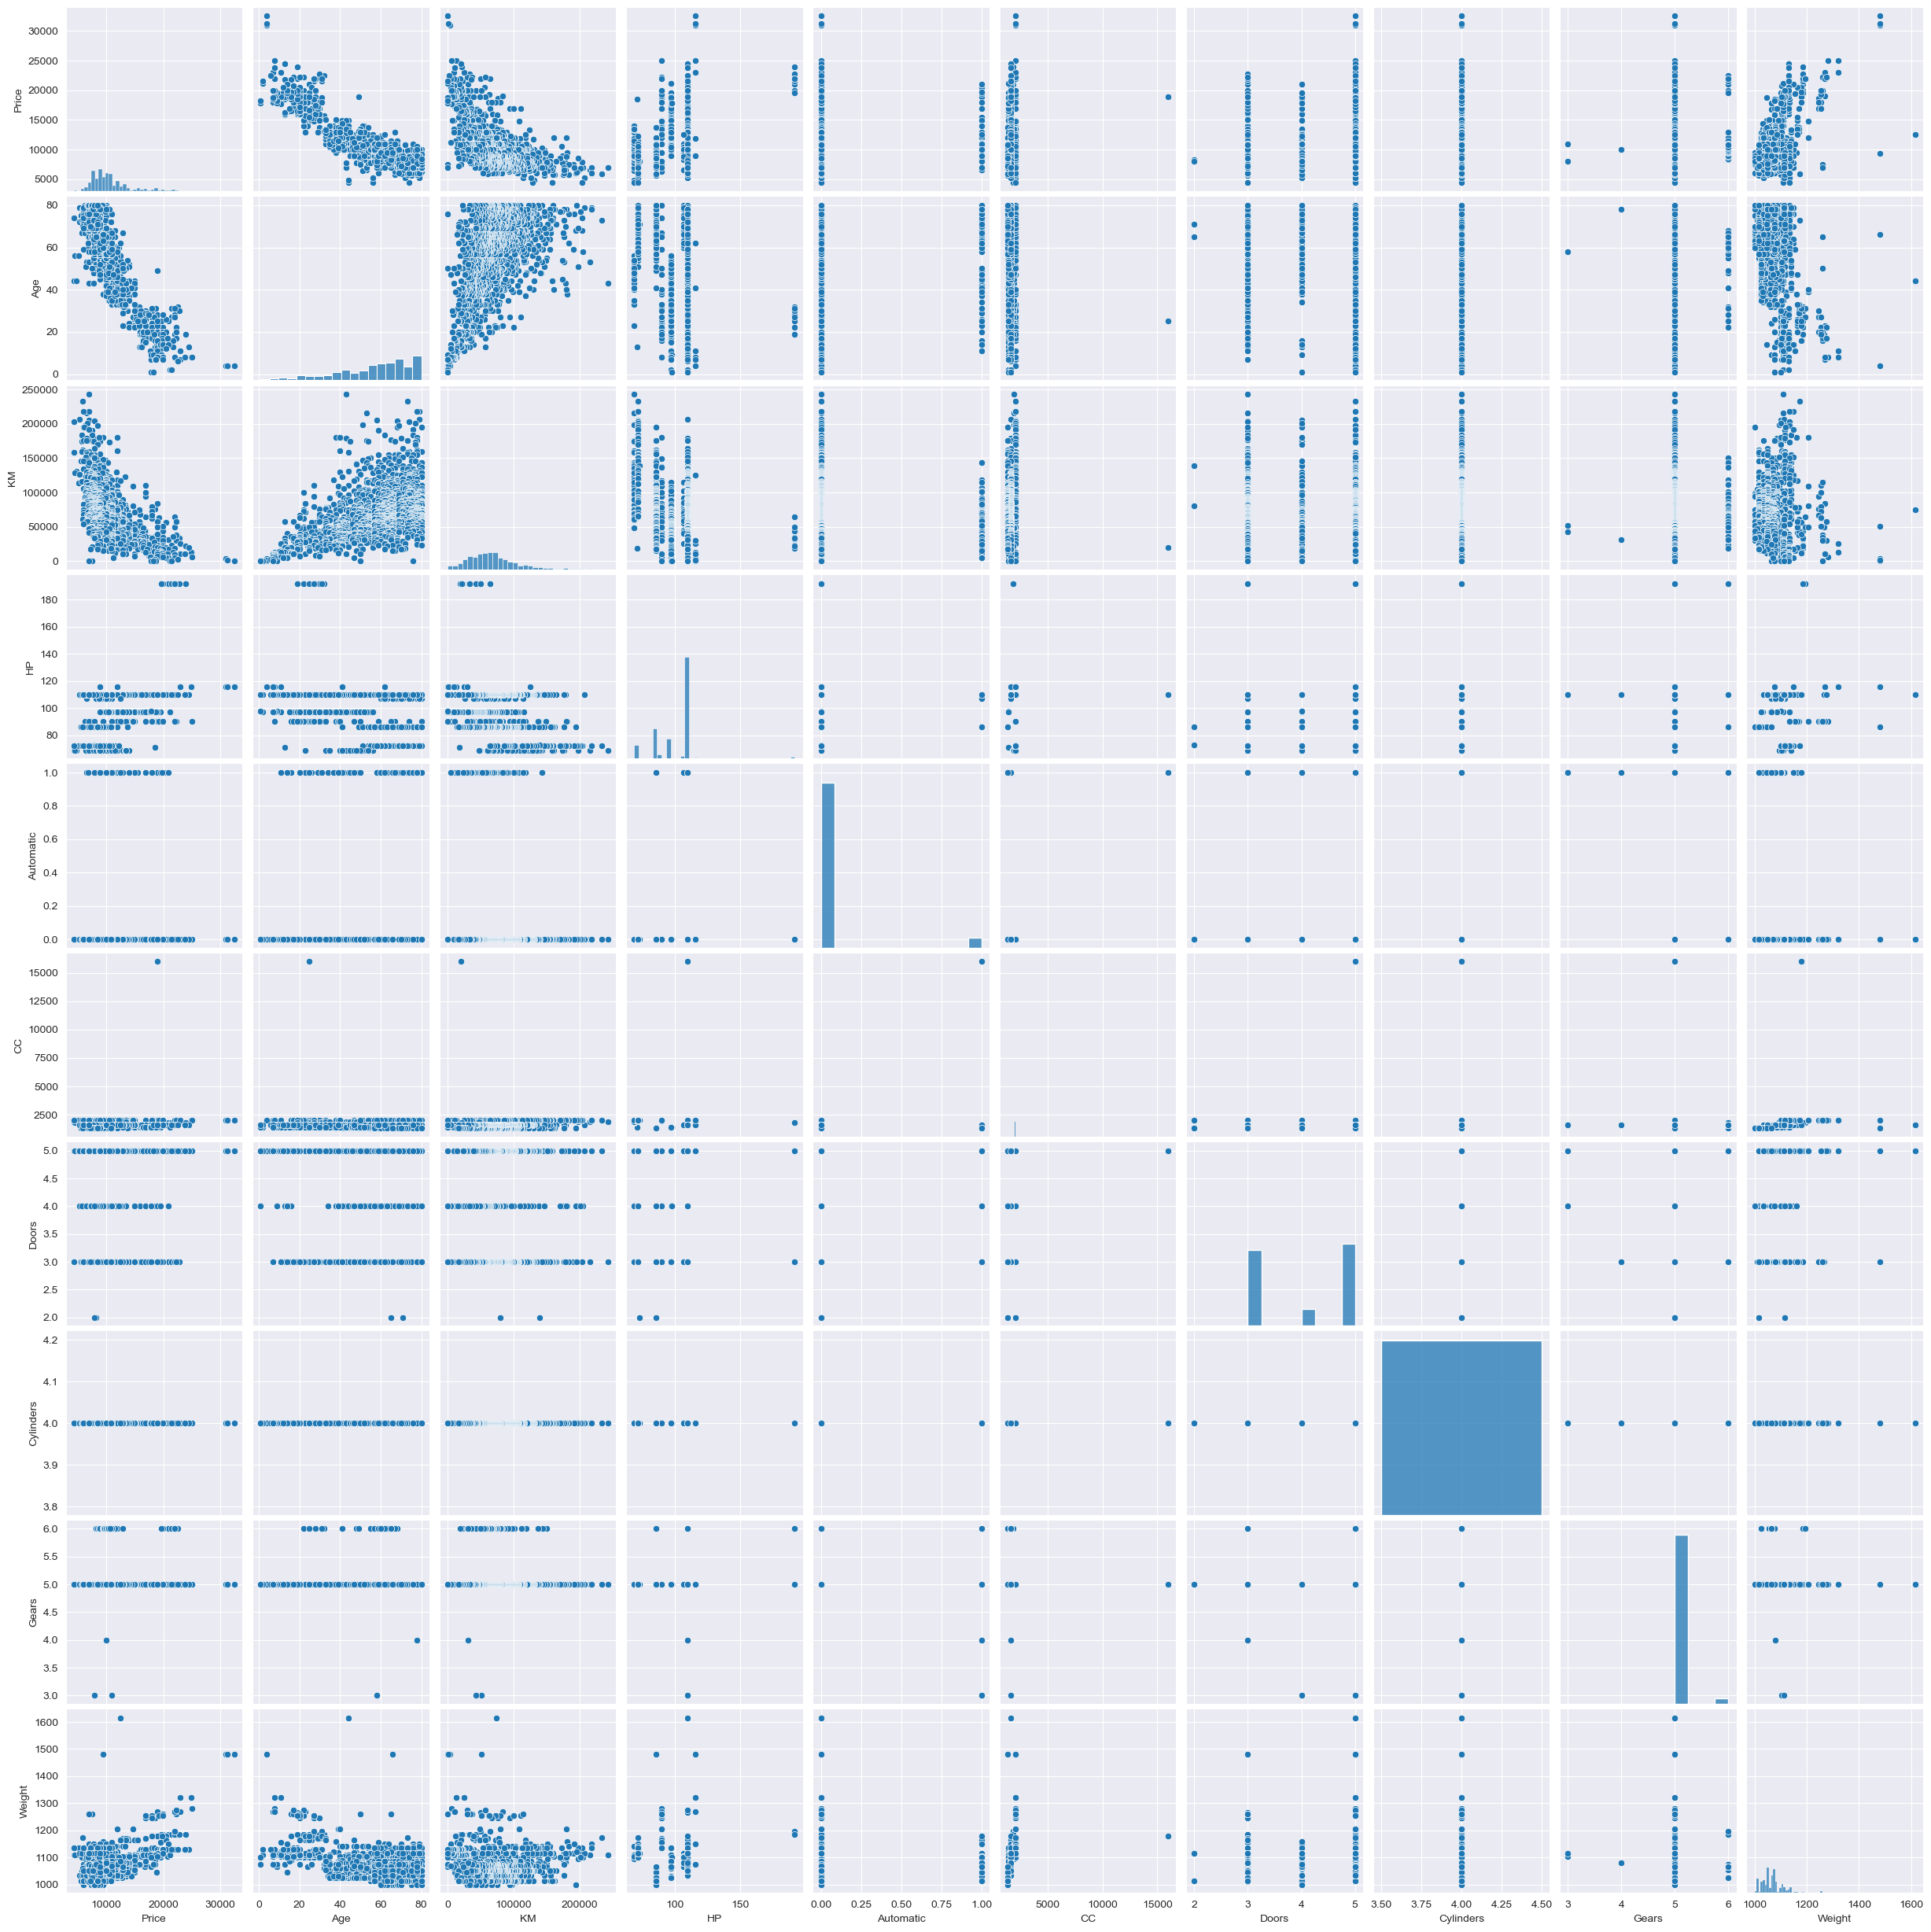

In [10]:
# Pairplot
sns.set_style(style = 'darkgrid')
sns.pairplot(toyo_data1)
plt.show()

There is a strong negative correlation between Age and KM with Price. A slight positive correlation between HP and Weight with the Price. Relationshipb between Automatic, CC, Door,  Gears and Fuel_Type(Petrol, Diesel, CNG)  with Price is little to no relationship..

These patterns suggest that Age, KM, HP and Weight are more likely to be useful predictors in a MLR model for predicting the car prices.

In [11]:
toyo = toyo_data1.drop(columns = ['Fuel_Type','Automatic','Cylinders'], axis = 1)
toyo

,Price,Age,KM,HP,CC,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,1025
1432,10845,72,19000,86,1300,3,5,1015
1433,8500,71,17016,86,1300,3,5,1015
1434,7250,70,16916,86,1300,3,5,1015


In [12]:
# Correlation matrix
toyo.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,1.000000


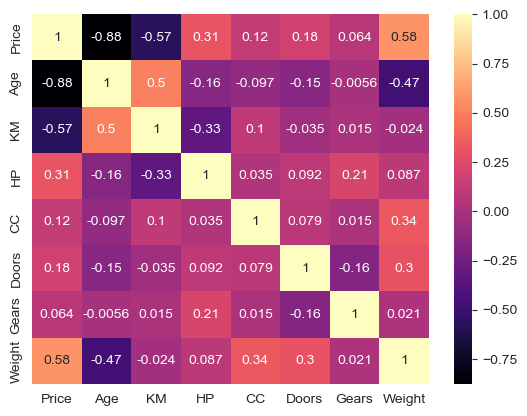

In [13]:
# Confimring with Heatmap
sns.heatmap(toyo.corr(), cmap = 'magma', annot =  True)
plt.show()

##### MODEL BUILDING & MODEL TESTING

In [14]:
# stats OLS model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight', data = toyo).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1270.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:33:53   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6969.4756   1321.000     -5.276      0.000   -9560.786   -4378.165
Age         -122.2804      2.614    -46.770      0.000    -127.409    -117.152
KM            -0.0198      0.001    -16.295      0.000      -0.022      -0.017
HP            28.4558      2.617     10.875      0.000      23.323      33.588
CC            -0.0862      0.090     -0.962      0.336      -0.262       0.090
Doors         -9.7001     39.984     -0.243      0.808     -88.134      68.733
Gears        623.4506    197.303      3.160      0.002     236.415    1010.486
Weight        18.6955      0.870     21.484      0.000      16.988      20.402
==============================================================================
Omnibus:                      200.969   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.264
Skew:                          -0.379   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model accuracy is 86.1%.

But there is multicollinearity.

In [16]:
# Finding tvalues and pvalues
model.tvalues, np.round(model.pvalues,5)

(Intercept    -5.275909
 Age         -46.770204
 KM          -16.295434
 HP           10.875433
 CC           -0.961569
 Doors        -0.242600
 Gears         3.159858
 Weight       21.484300
 dtype: float64,
 Intercept    0.00000
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.33643
 Doors        0.80835
 Gears        0.00161
 Weight       0.00000
 dtype: float64)

P-values of CC and Doors are greater than 0.05 hence they may be causing multicollinearity.

In [17]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'

slr_cc = smf.ols('Price~CC', data = toyo).fit()
print('t-values:\n',slr_cc.tvalues,'\np-values:\n', slr_cc.pvalues)

t-values:
 Intercept    24.879592
CC            4.745039
dtype: float64 
p-values:
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [18]:
slr_doors = smf.ols('Price~Doors', data = toyo).fit()
print('t-values:\n',slr_doors.tvalues,'\np-values:\n', slr_doors.pvalues)

t-values:
 Intercept    19.421546
Doors         7.070520
dtype: float64 
p-values:
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [19]:
mlr_cc_doors = smf.ols('Price~CC+Doors', data = toyo).fit()
mlr_cc_doors.tvalues, mlr_cc_doors.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

CC and Doors has significant pvlaues

###### MODEL VALIDATION

In [20]:
#1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Weight',data=toyo).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Weight',data=toyo).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Weight',data=toyo).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Weight',data=toyo).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Weight',data=toyo).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Weight',data=toyo).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears',data=toyo).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.866075
1,KM,1.644674
2,HP,1.217300
3,CC,1.146123
4,Doors,1.149462
5,Gears,1.096679
6,Weight,1.637860


vif < 20, so no collinearity. All variables can be considered in the model.

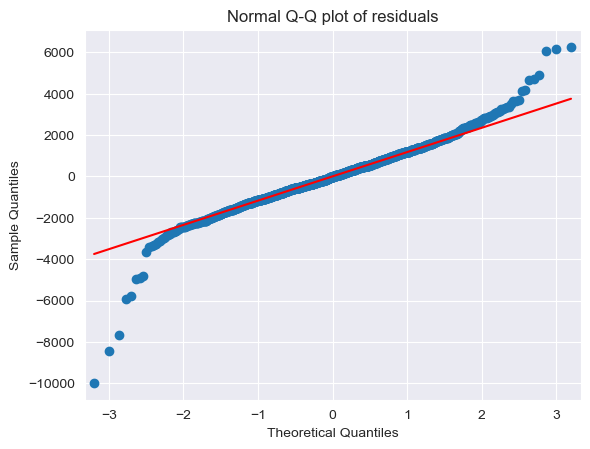

In [21]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

import statsmodels.api as sm
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [23]:
list(np.where(model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

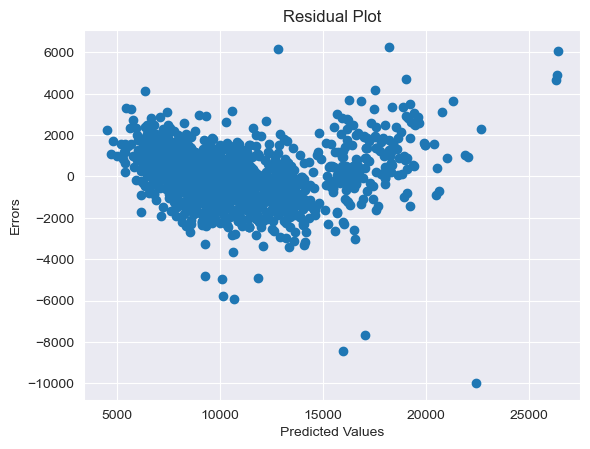

In [24]:
# Test for Homoscedasticity or Heteroscedacity
plt.scatter(model.fittedvalues, model.resid)
plt.title("Residual Plot")
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.show()

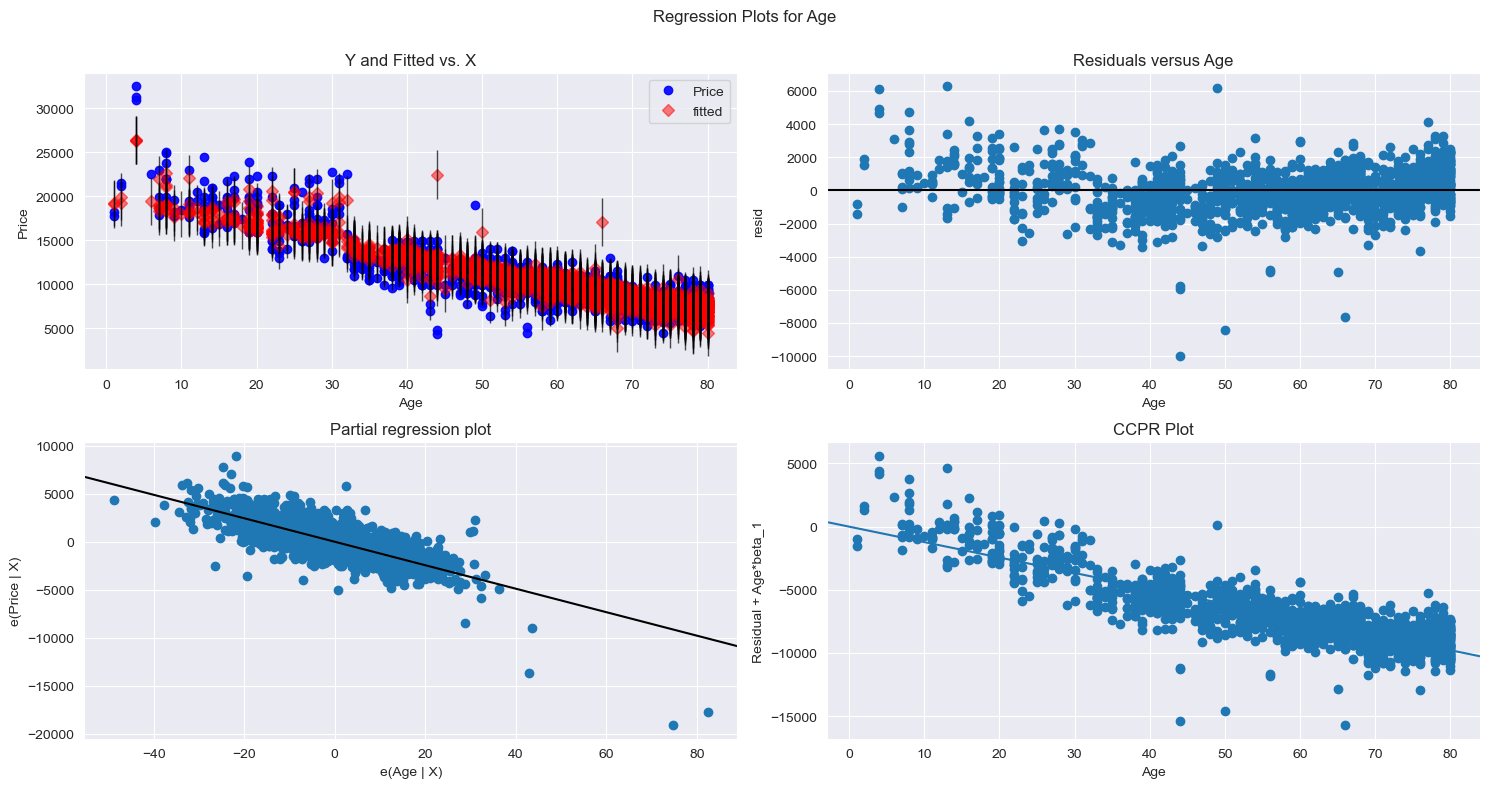

In [25]:
# Residual vs regression Plot
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

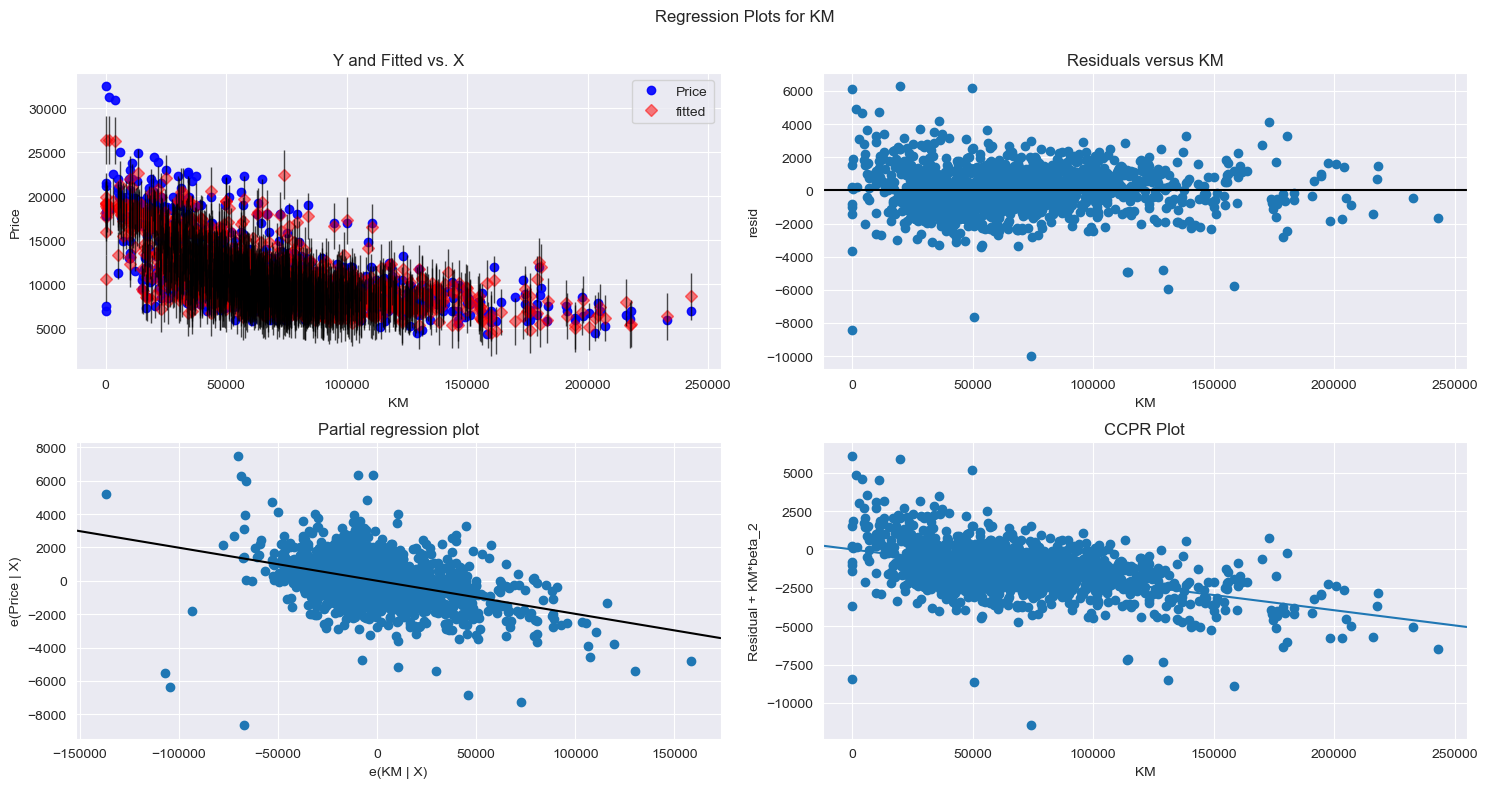

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

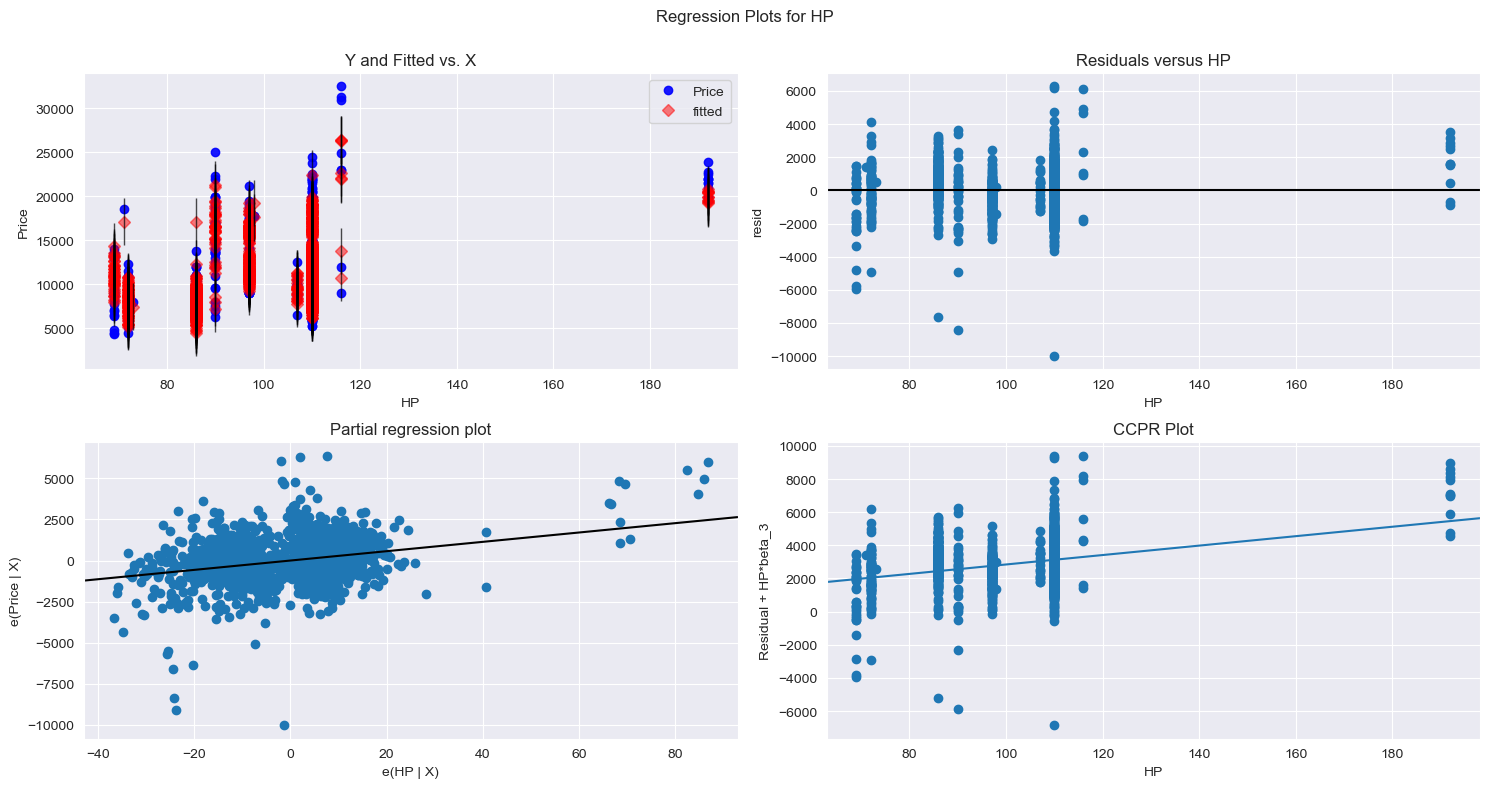

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

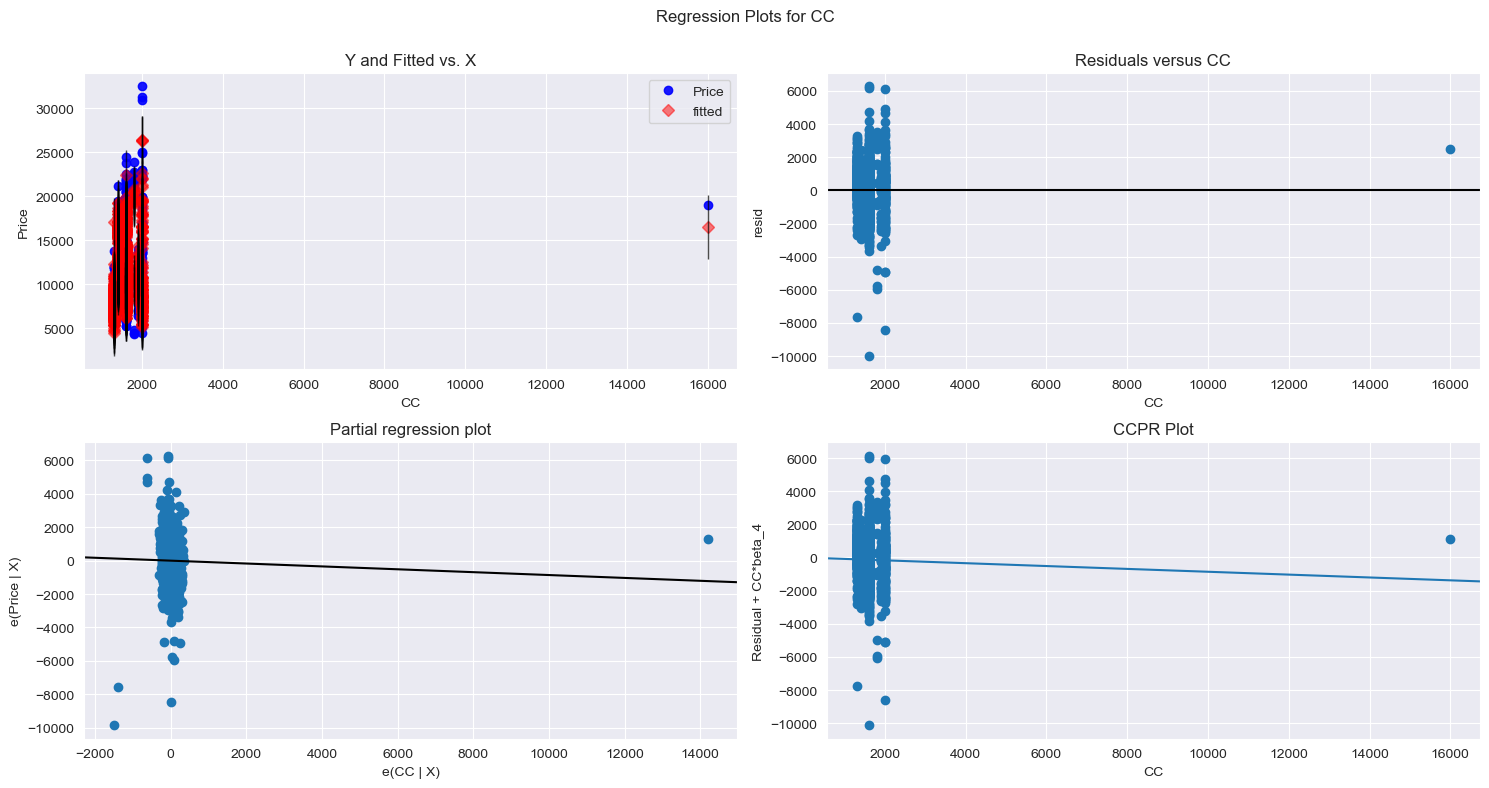

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

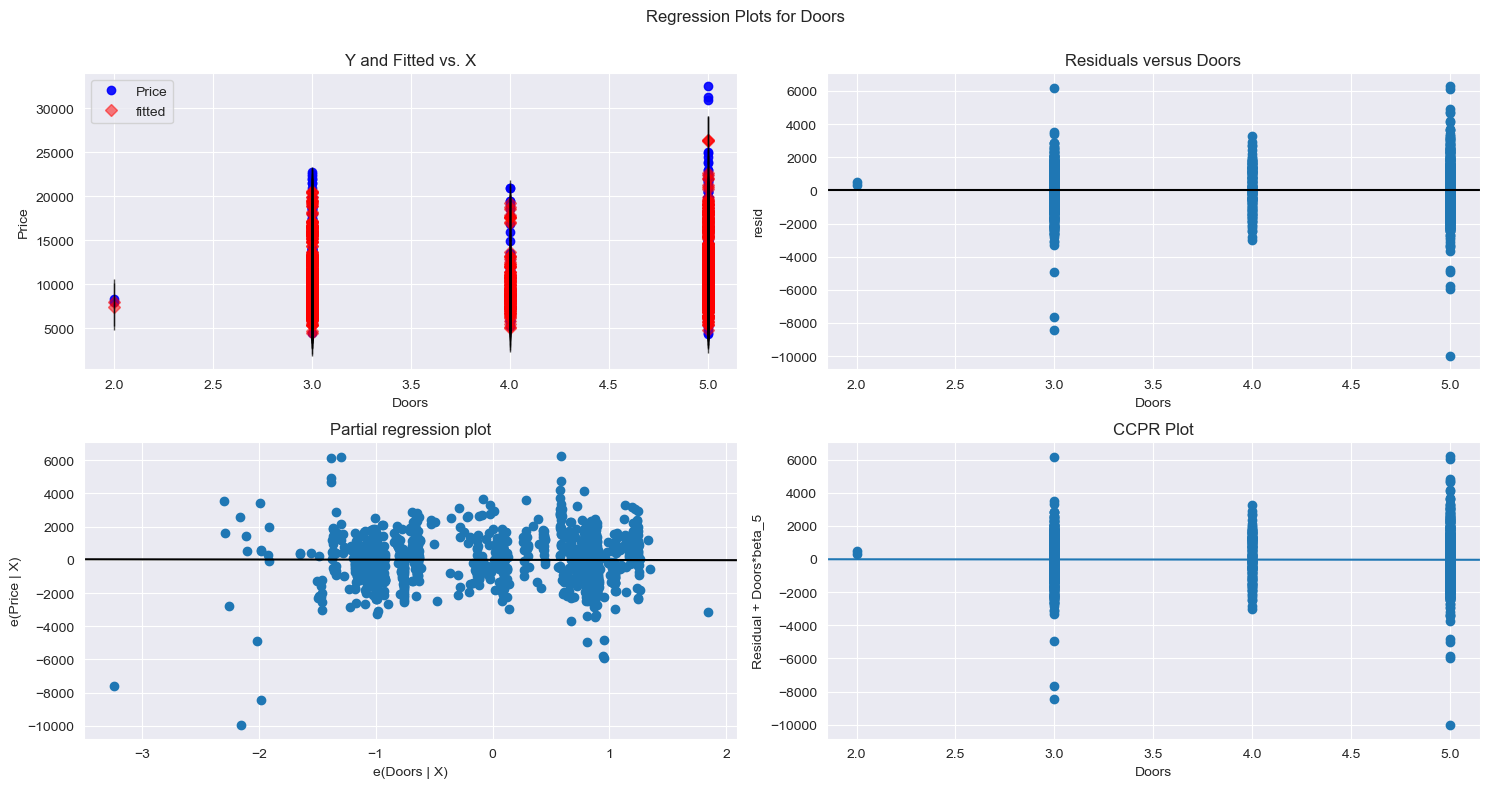

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

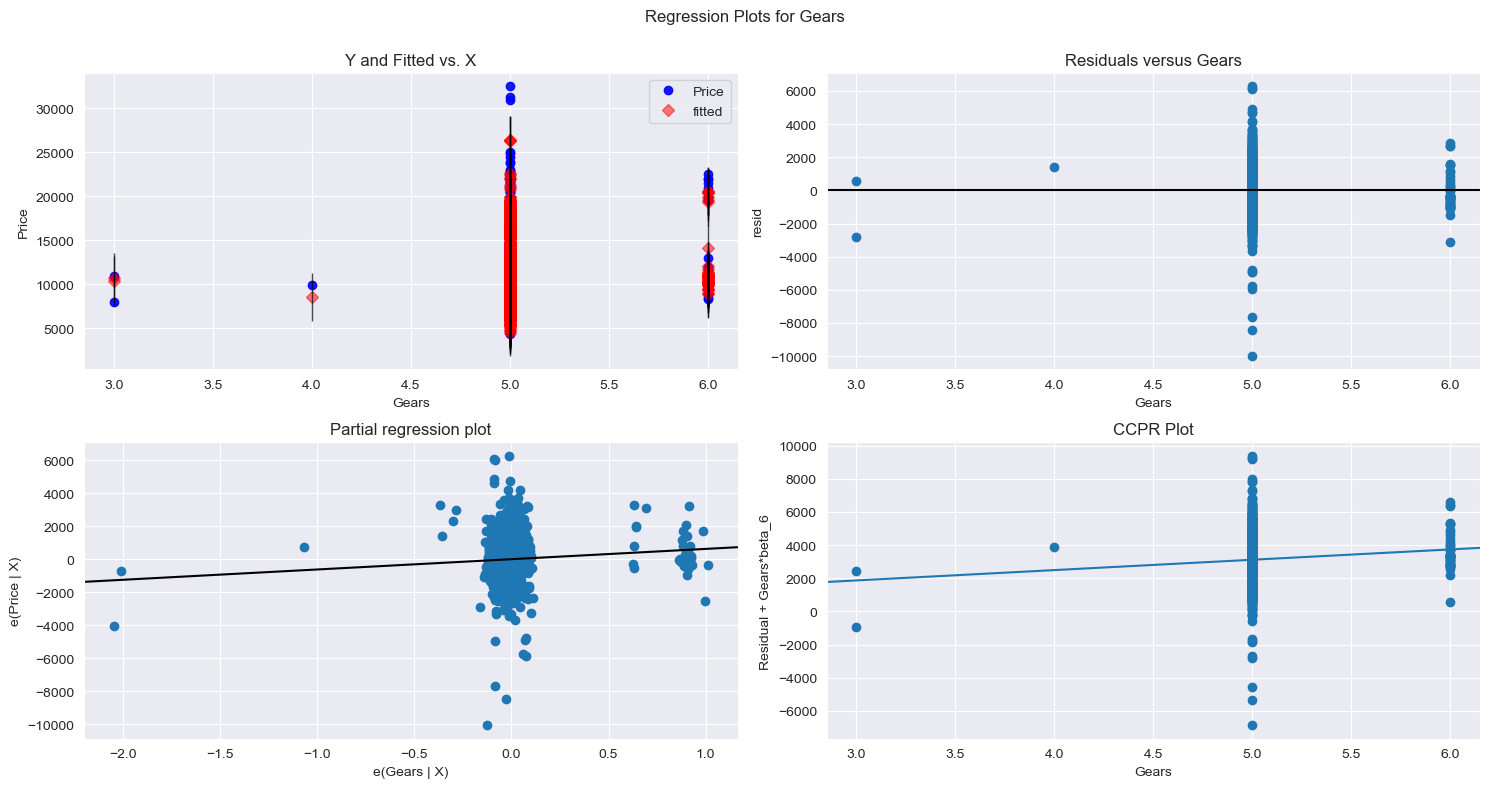

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

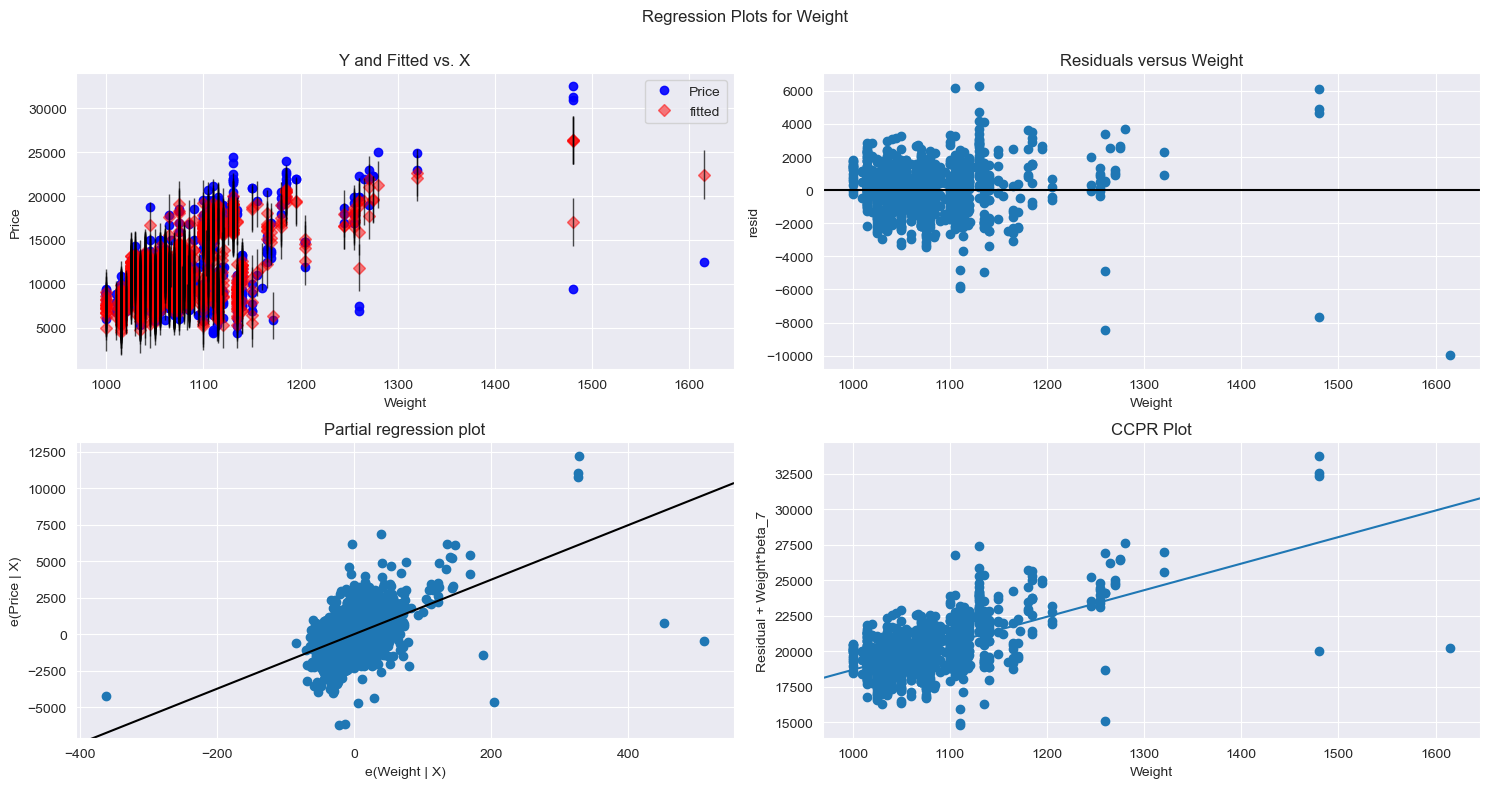

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

##### MODEL DELETION AND DIAGNOSTICS
(Checking Outliers or Influencers)

In [32]:
# 1) COOK'S DISTANCE
# If cook's distance  > 1 then its an outlier

c, p = model.get_influence().cooks_distance
c

array([4.31448029e-03, 2.47767928e-03, 3.10453539e-03, ...,
       3.52979316e-06, 7.17412605e-04, 1.05021261e-02])

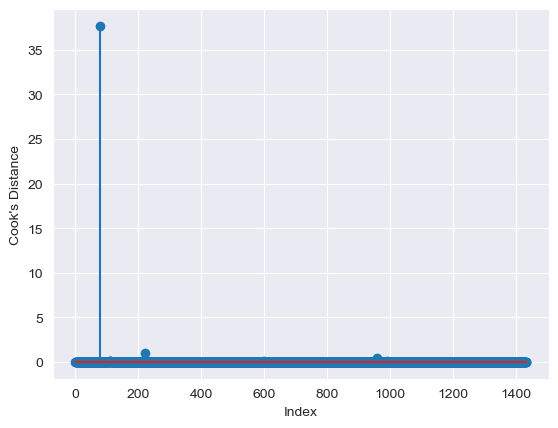

In [33]:
plt.stem(np.arange(len(toyo)), np.round(c,3))
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.show()

In [34]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)     # oultier in the 80th row

(80, 37.679388032641384)

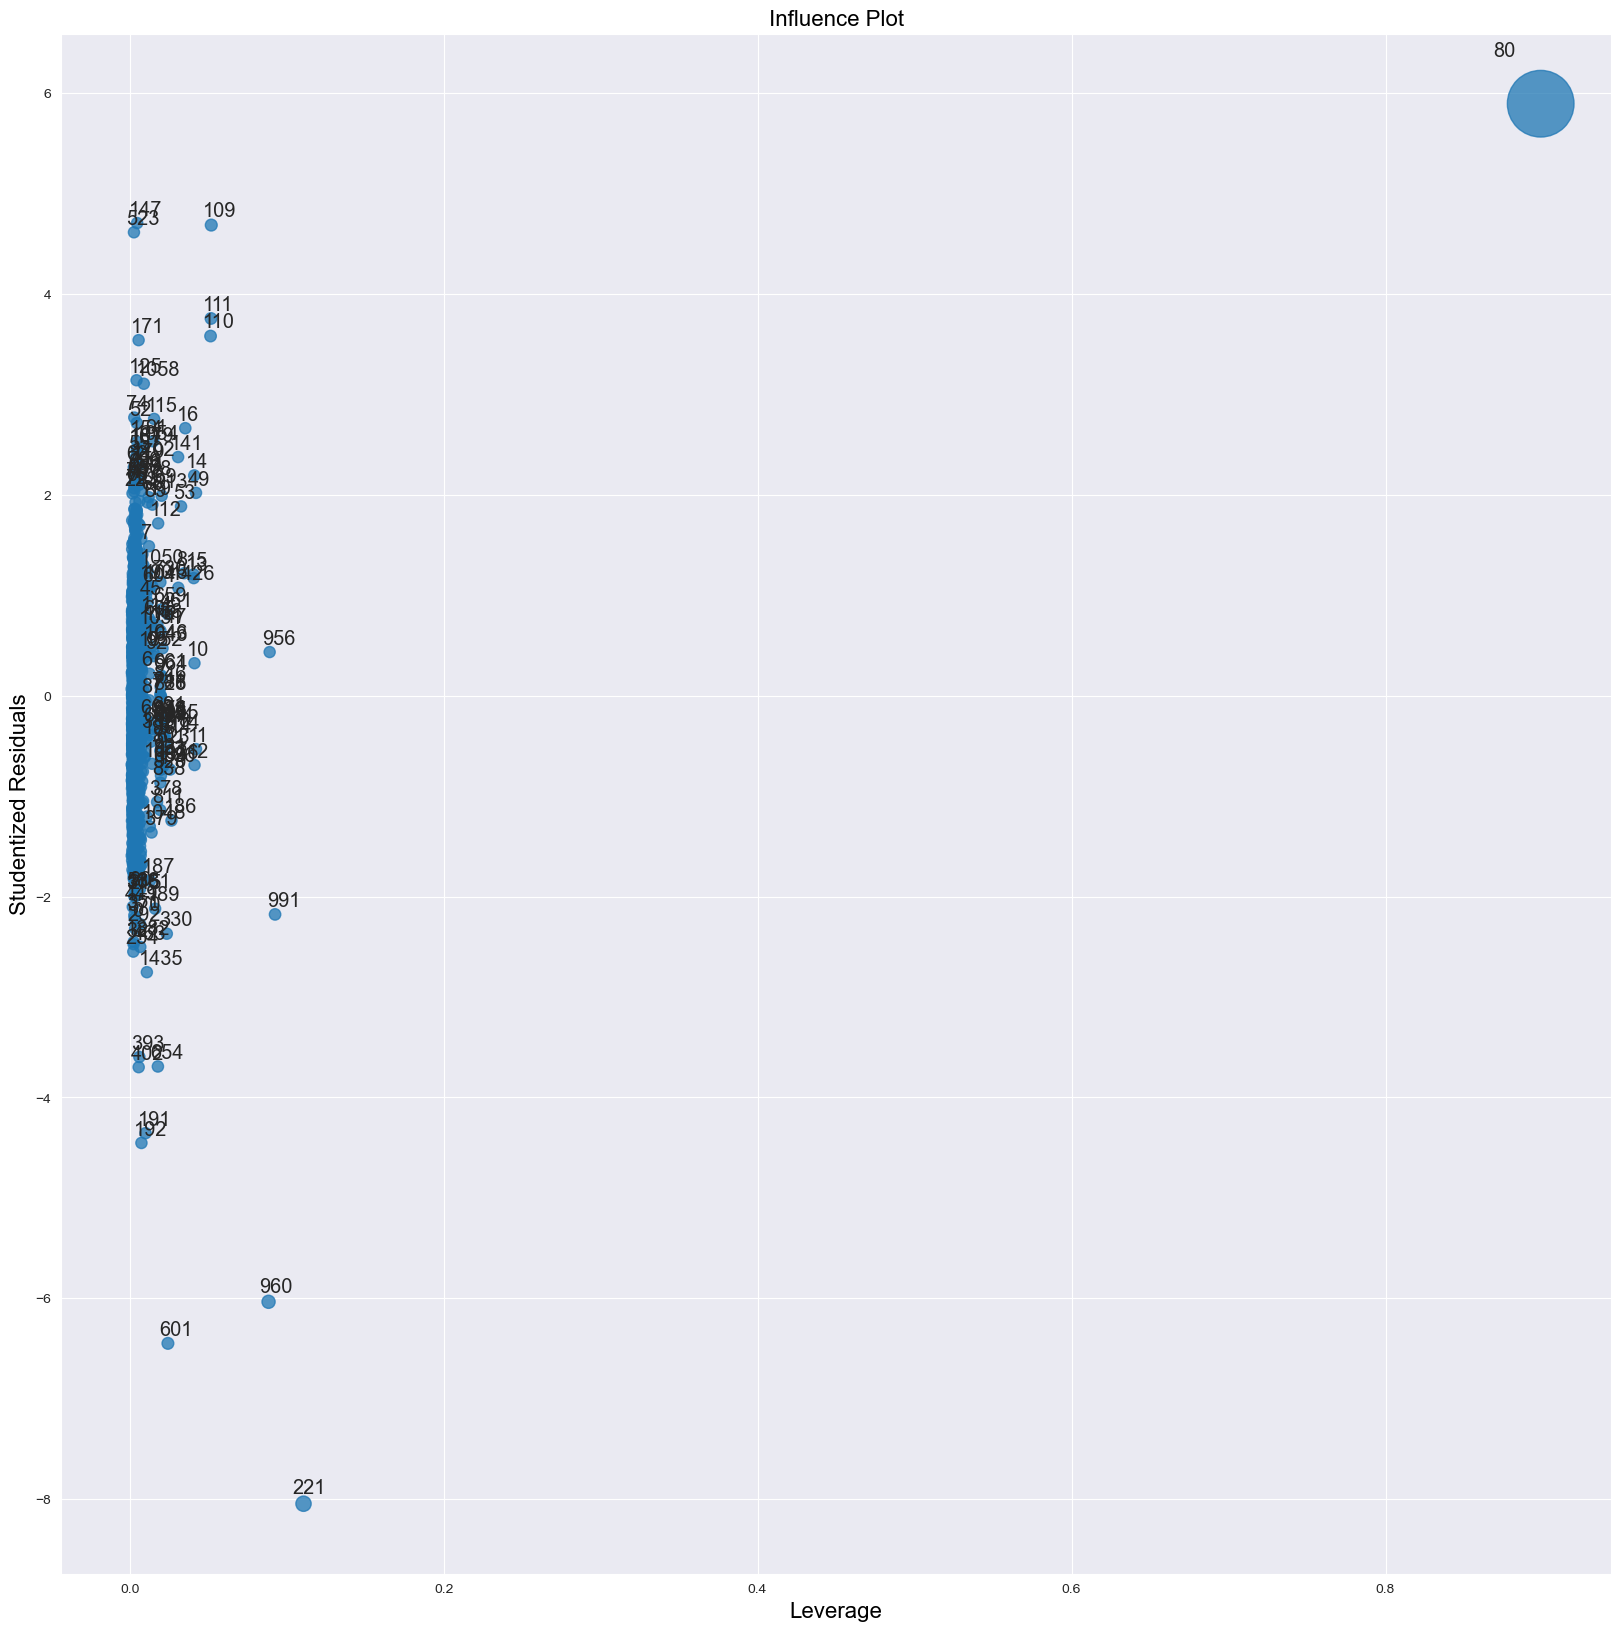

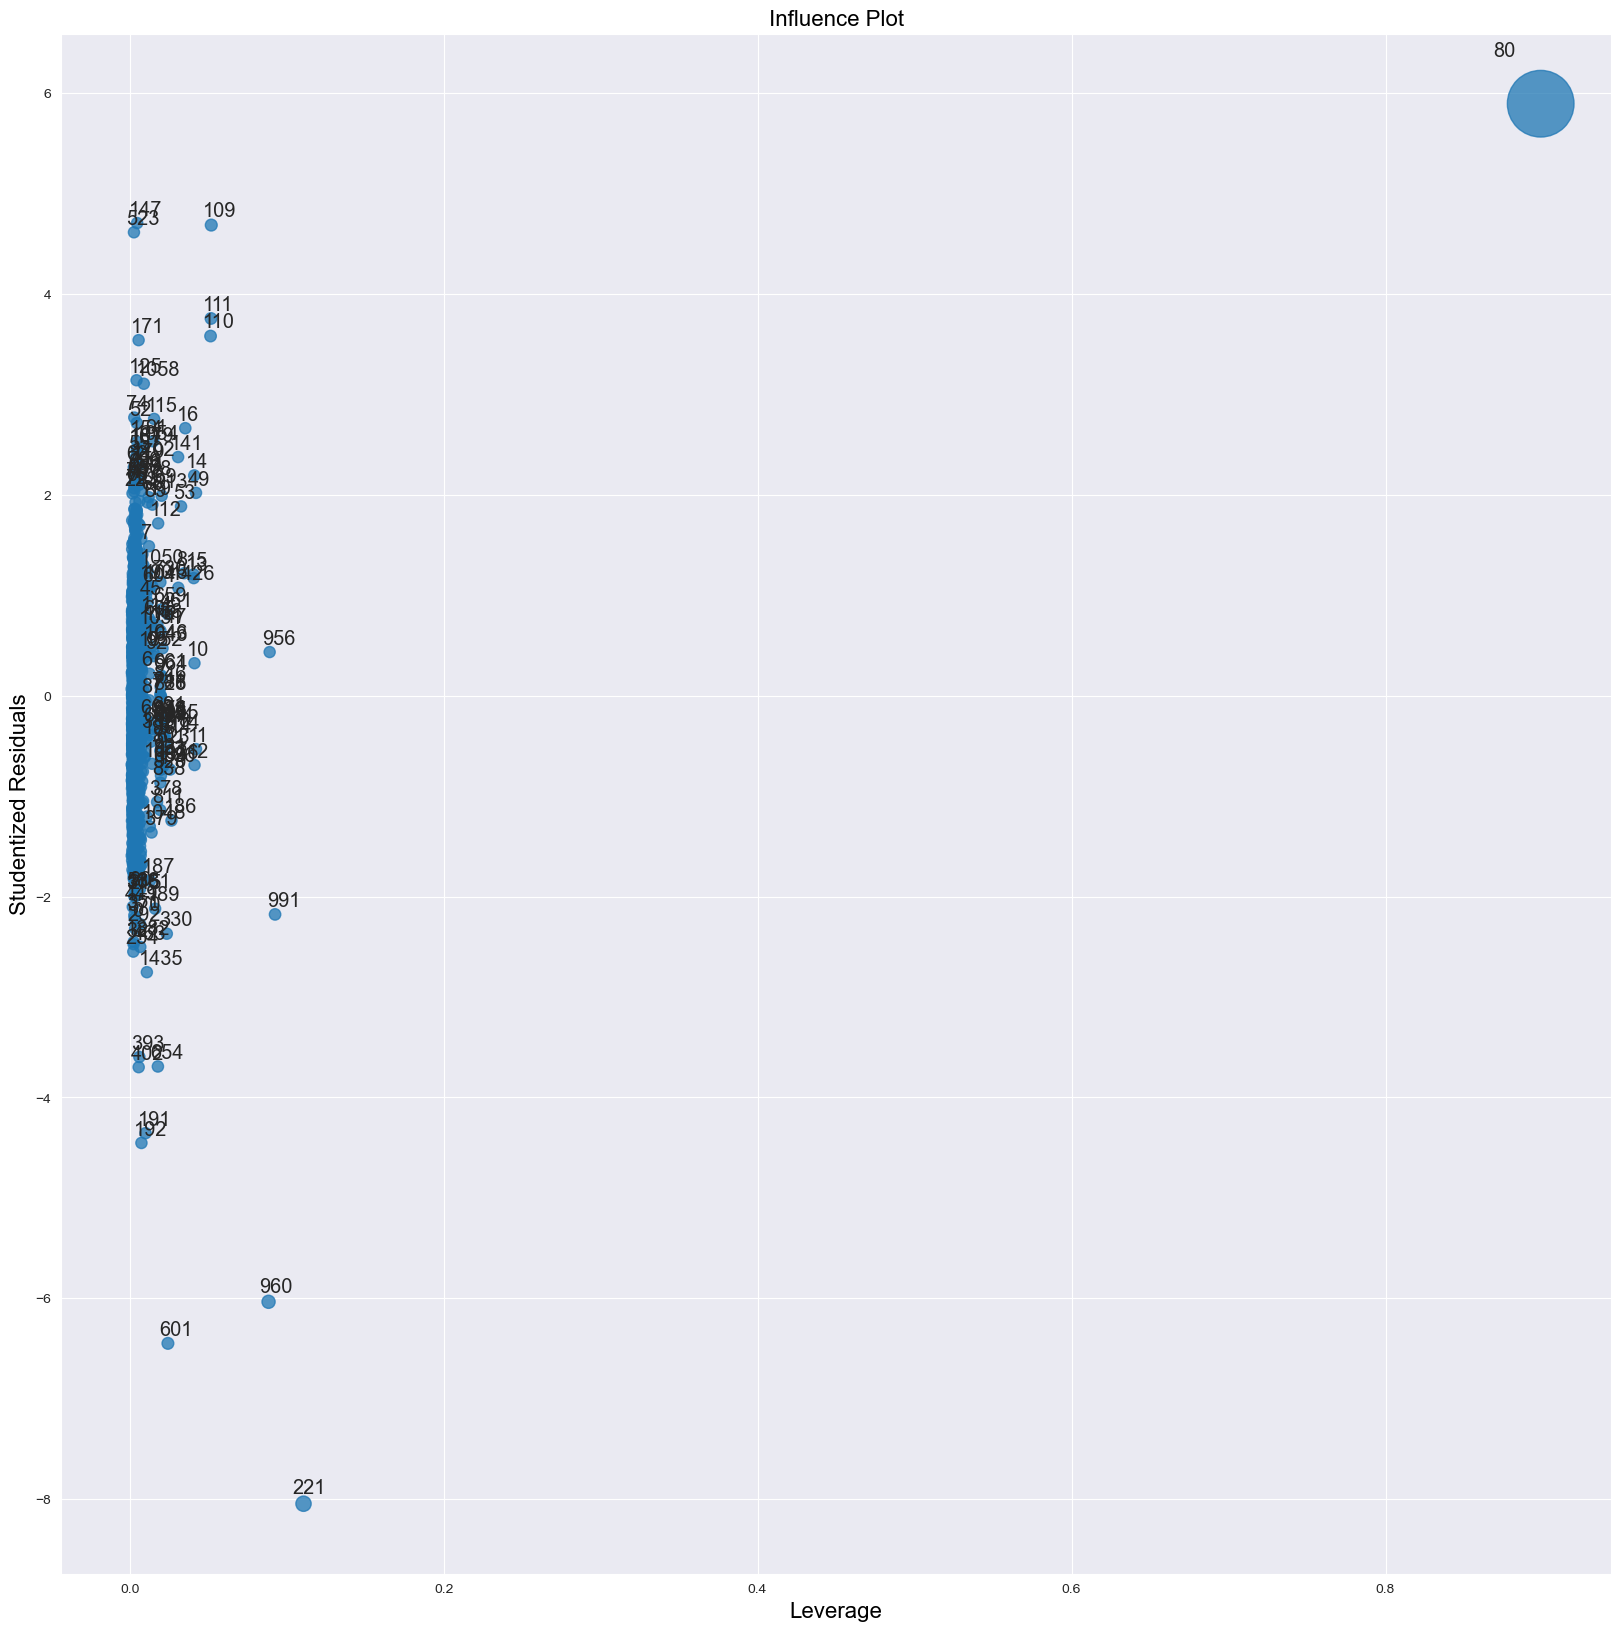

In [35]:
# 2) INFLUENCE PLOT
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (20,20))
influence_plot(model, ax = ax)

In [36]:
# leverage cutoff value = 3 *(k+1)/n

k = toyo.shape[1]
n = toyo.shape[0]

leverage = 3*(k+1)/n
leverage

0.018815331010452963

the points beyond the cutoff value 0.018815331010452963 are outliers

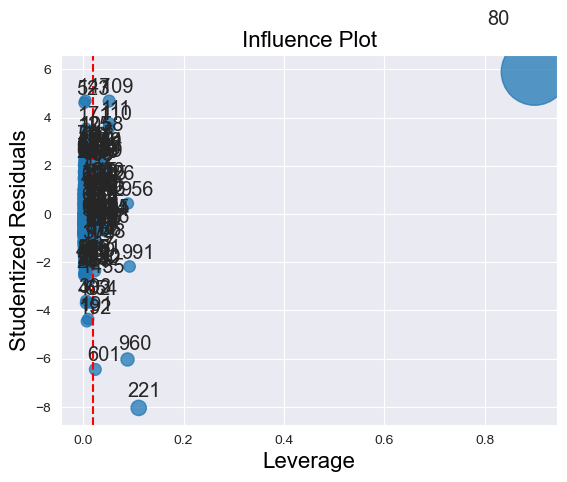

In [38]:
influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')
# axvline: axis vertical line to draw a vertical line
plt.show()

In [39]:
toyo[toyo.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Weight
80,18950,25,20019,110,16000,5,5,1180


In [40]:
toyo = toyo.drop(80).reset_index(drop = True)
toyo

,Price,Age,KM,HP,CC,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,1025
1430,10845,72,19000,86,1300,3,5,1015
1431,8500,71,17016,86,1300,3,5,1015
1432,7250,70,16916,86,1300,3,5,1015


###### Model Deletion Diagnostics and Final Model

In [41]:
while np.max(c) > 0.5:
    model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight', data = toyo).fit()
    c, p = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    toyo = toyo.drop([np.argmax(c)]).reset_index(drop = True)
    toyo
else:
    final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight', data = toyo).fit()
    final_model.rsquared, final_model.aic
    print("Model accuracy is improved to", final_model.rsquared)

Model accuracy is improved to 0.8876768823747953


In [42]:
final_model.rsquared

0.8876768823747953

In [43]:
toyo

,Price,Age,KM,HP,CC,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,1025
1427,10845,72,19000,86,1300,3,5,1015
1428,8500,71,17016,86,1300,3,5,1015
1429,7250,70,16916,86,1300,3,5,1015


In [47]:
# MODEL PREDICTION

new_data = pd.DataFrame({'Age':12,'KM':40000,'HP':80,'CC':1300,'Doors':4,'Gears':5,'Weight':1012}, index = [0])
new_data

,Age,KM,HP,CC,Doors,Gears,Weight
0,12,40000,80,1300,4,5,1012


In [48]:
final_model.predict(new_data)

0    14320.039208
dtype: float64

In [50]:
y_pred = final_model.predict(toyo)
y_pred

0       16198.360543
1       15746.702250
2       16179.666315
3       15849.207301
4       15740.147564
            ...     
1426     9132.186959
1427     8492.340356
1428     8637.372204
1429     8749.614401
1430    11118.305918
Length: 1431, dtype: float64

In [51]:
toyo

,Price,Age,KM,HP,CC,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,1025
1427,10845,72,19000,86,1300,3,5,1015
1428,8500,71,17016,86,1300,3,5,1015
1429,7250,70,16916,86,1300,3,5,1015


In [52]:
from sklearn.model_selection import train_test_split
X = toyo.drop(columns = ['Price'])
Y = toyo.Price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1000)

In [55]:
# LASSO REGRESSION MODEL
from sklearn.linear_model import Lasso

# MODEL TRAINING
Lasso_model = Lasso(alpha = 0.05)
Lasso_model.fit(X_train, Y_train)

# Coefficients
Lasso_coef = pd.DataFrame(Lasso_model.coef_, X.columns, columns = ['Coefficient'])
print(Lasso_coef)

# PREDICTIONS
Y_pred = Lasso_model.predict(X_test)

# MODEL EVALUATION
from sklearn.metrics import mean_squared_error, r2_score
print('\nMODEL EVALUATION')
lasso_mse = mean_squared_error(Y_test, Y_pred)
lasso_r2 = r2_score(Y_test, Y_pred)
print(f'Mean Square Error: {lasso_mse}')
print(f'R-squared: {lasso_r2}')

        Coefficient
Age     -111.014453
KM        -0.017106
HP        32.209603
CC        -3.400156
Doors   -170.643098
Gears    285.004592
Weight    33.373136

MODEL EVALUATION
Mean Square Error: 1419300.2841303959
R-squared: 0.885198653314135


In [56]:
# RIDGE REGRESSION MODEL
from sklearn.linear_model import Ridge

# MODEL TRAINING
Ridge_model = Ridge(alpha = 0.05)
Ridge_model.fit(X_train, Y_train)

# Coefficients
Ridge_coef = pd.DataFrame(Ridge_model.coef_, X.columns, columns = ['Coefficient'])
print(Ridge_coef)

# PREDICTIONS
Y_pred = Ridge_model.predict(X_test)

# MODEL EVALUATION
print('\nMODEL EVALUATION')
ridge_mse = mean_squared_error(Y_test, Y_pred)
ridge_r2 = r2_score(Y_test, Y_pred)
print(f'Mean Square Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')

        Coefficient
Age     -111.014361
KM        -0.017106
HP        32.206096
CC        -3.400153
Doors   -170.648428
Gears    286.136488
Weight    33.373137

MODEL EVALUATION
Mean Square Error: 1419228.311501875
R-squared: 0.8852044748832357
